In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from evaluation import visualize_results
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import HistGradientBoostingRegressor
import warnings
from sklearn.exceptions import FitFailedWarning
import numpy as np
import matplotlib.pyplot as plt

# Tắt tất cả các cảnh báo từ sklearn và các cảnh báo khác
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## 1. Kháo bái các hàm xử lý 

In [2]:
import os
from settings import BASE_DIR
from data import processing_data
# Loading our dataset

data_path = os.path.join(BASE_DIR, "dataset", "train.csv")
df = pd.read_csv(data_path)
df.head()

,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_budget,log_no_of_votes,log_gross,log_gross_bin
0,"Supernatural Horror, Vampire Horror, Horror, T...",5.6,33000,47.000000,2024.0,851156.0,26000000.0,United States,17.073607,10.404293,13.654352,1
1,"Drama, Music, Romance",5.6,23000,55.000000,2017.0,1813453.0,26000000.0,United States,17.073607,10.043293,14.410744,1
2,"Computer Animation, Adventure, Animation, Come...",6.0,18000,53.000000,2023.0,209646030.0,95000000.0,"United States, United Kingdom",18.369387,9.798183,19.160931,8
3,"Body Horror, Folk Horror, Monster Horror, Supe...",4.5,12000,45.000000,2024.0,2014050.0,20000000.0,"United States, United Kingdom, Germany, Bulgaria",16.811243,9.392745,14.515659,1
4,"Steamy Romance, Drama, Romance",6.0,27000,64.812903,2010.0,844281.0,26000000.0,Spain,17.073607,10.203629,13.646242,1


In [3]:
def train_best_hgb_model(X_train, y_train, cv=5, scoring='neg_mean_absolute_error'):
    """
    Huấn luyện GradientBoostingRegressor với GridSearchCV và trả về mô hình tốt nhất.
    
    Parameters:
        X_train (ndarray): Dữ liệu huấn luyện đầu vào (đã chuẩn hóa).
        y_train (ndarray): Nhãn huấn luyện.
        cv (int): Số lượng folds dùng trong cross-validation.
        scoring (str): Chiến lược đánh giá. Mặc định là RMSE âm (để chọn RMSE nhỏ nhất).
    
    Returns:
        best_model (GradientBoostingRegressor): Mô hình tốt nhất sau khi tìm kiếm.
        best_params (dict): Bộ tham số tốt nhất.
    """

    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_iter': [200, 300],
        'max_depth': [3, 5, None],
        'l2_regularization': [0.0, 1.0],
    }

    hgb = HistGradientBoostingRegressor(
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=5,
        random_state=42
    )

    grid_search = GridSearchCV(
        hgb, param_grid, cv=cv,
        scoring=scoring, n_jobs=-1, verbose=0
    )

    grid_search.fit(X_train, y_train)

    print(f"✅ Best parameters found: {grid_search.best_params_}")

    return grid_search.best_estimator_, grid_search.best_params_

## 2. Train model


🔁 Fold 1
✅ Scaler saved to: d:\Thanh\TLHT\HK6\KHDL\movie-analyst\best_models\GB_model\fold_1\scaler.pkl
✅ Best parameters found: {'l2_regularization': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 200}
🔍 Best params for fold 1: {'l2_regularization': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 200}
✅ Early stopped at iteration: 111
📉 Validation loss at best iteration: -0.9269
Training Metrics
R2 score: 0.7296
MAE: 50,515,794.2885
MAPE: 3.90%
Val Metrics
R2 score: 0.6675
MAE: 55,432,260.1047
MAPE: 5.93%


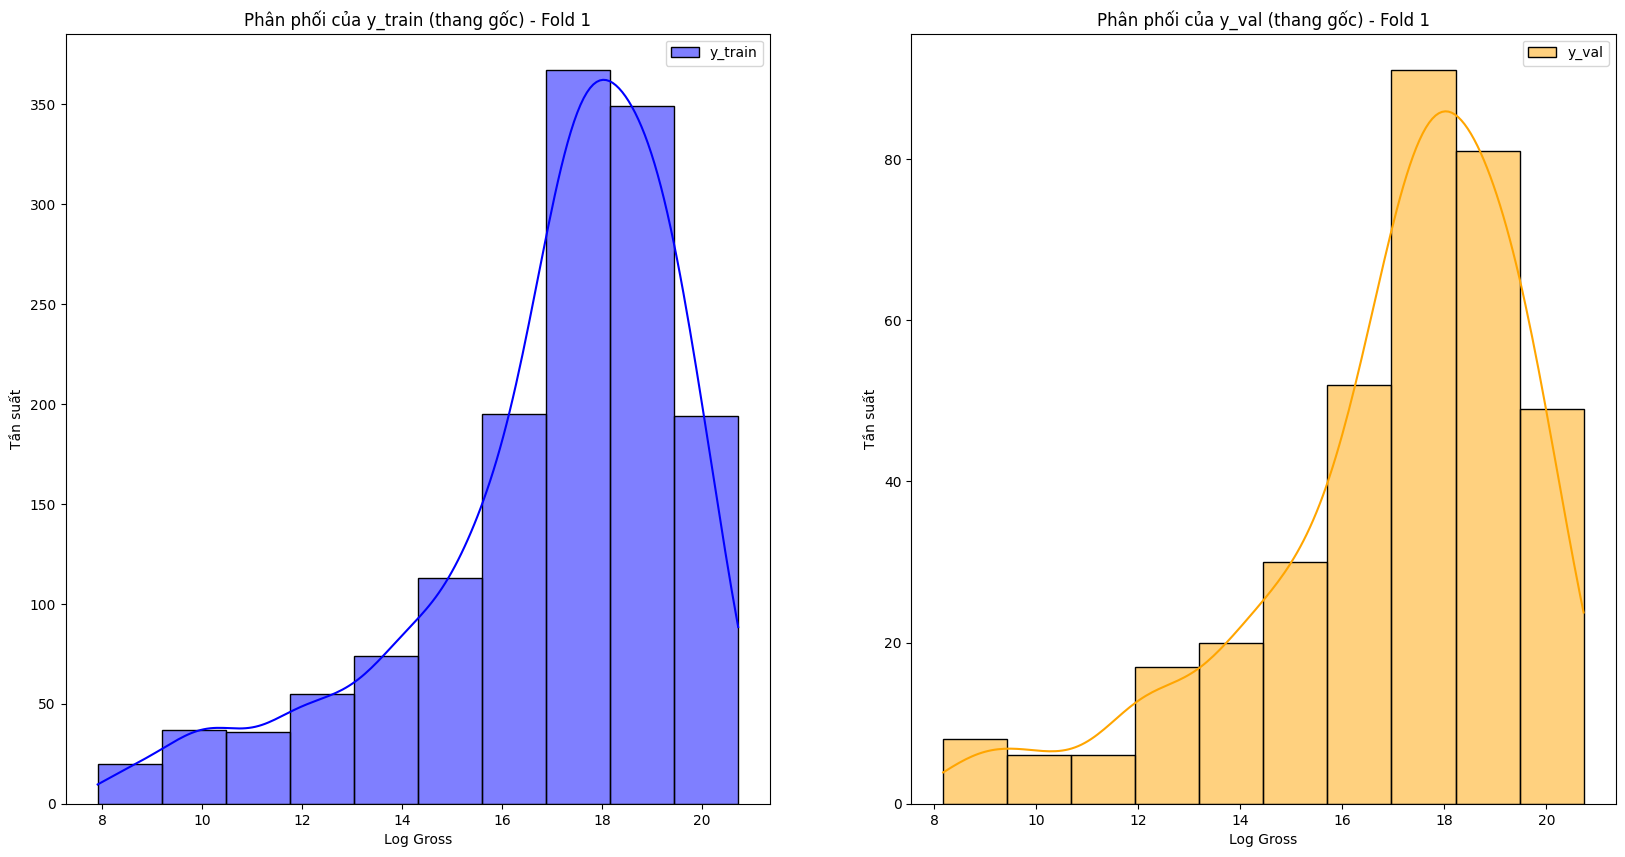

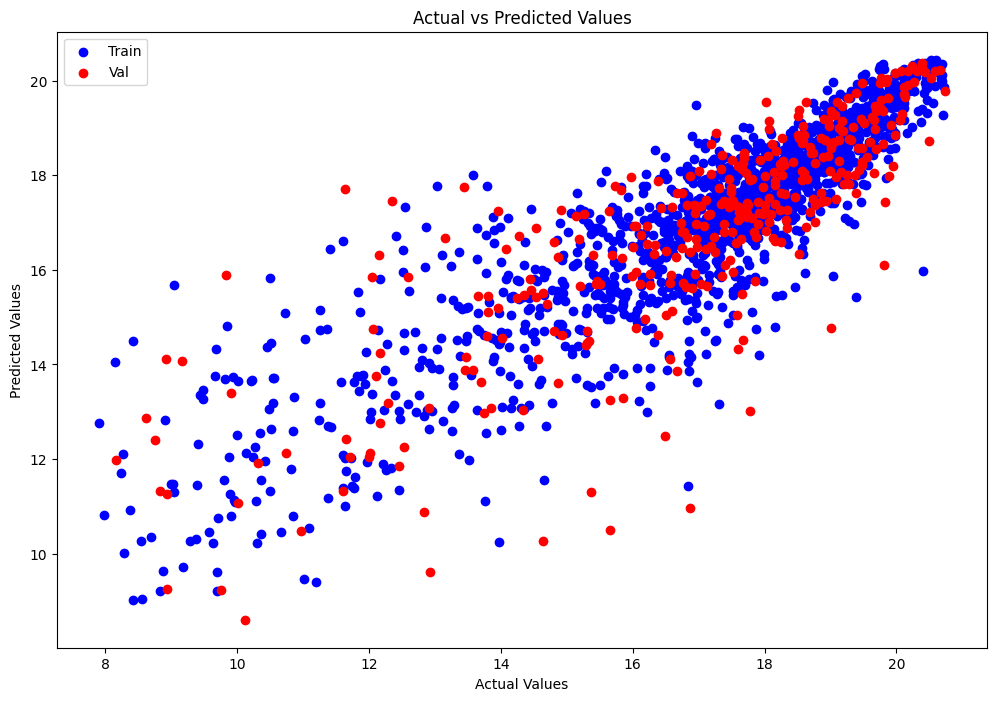

⚠️ Model does not support 'feature_importances_' (e.g., HistGradientBoostingRegressor). Skipping feature importance plot.
📊 Train Metrics - R2: 0.7296, MAE: 50,515,794.29, MAPE: 389.63%
📊 Val Metrics   - R2: 0.6675, MAE: 55,432,260.10, MAPE: 593.34%
✅ Model for fold 1 saved to: best_models/GB_model/fold_1\model.pkl

🔁 Fold 2
✅ Scaler saved to: d:\Thanh\TLHT\HK6\KHDL\movie-analyst\best_models\GB_model\fold_2\scaler.pkl
✅ Best parameters found: {'l2_regularization': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 200}
🔍 Best params for fold 2: {'l2_regularization': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 200}
✅ Early stopped at iteration: 83
📉 Validation loss at best iteration: -1.2861
Training Metrics
R2 score: 0.7011
MAE: 51,324,768.8498
MAPE: 5.05%
Val Metrics
R2 score: 0.6853
MAE: 59,030,495.9516
MAPE: 7.02%


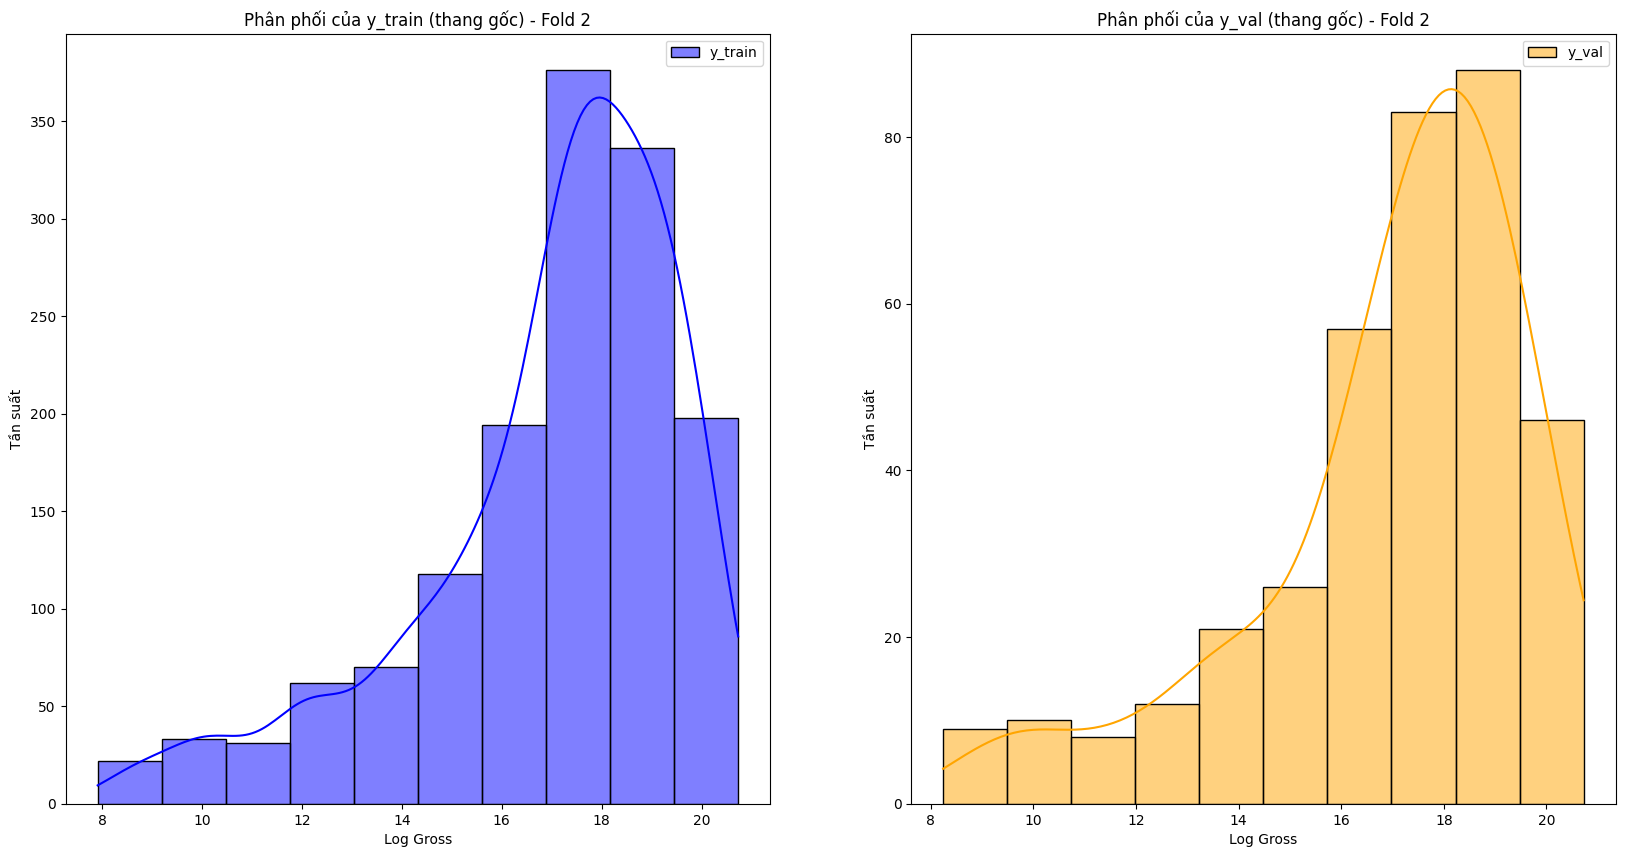

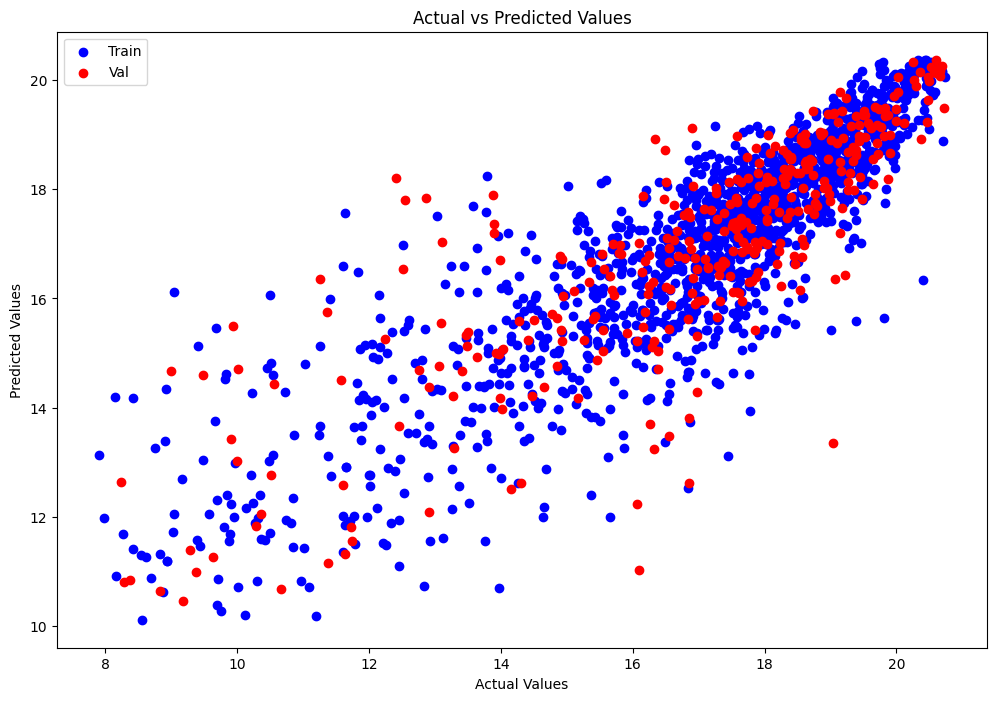

⚠️ Model does not support 'feature_importances_' (e.g., HistGradientBoostingRegressor). Skipping feature importance plot.
📊 Train Metrics - R2: 0.7011, MAE: 51,324,768.85, MAPE: 504.95%
📊 Val Metrics   - R2: 0.6853, MAE: 59,030,495.95, MAPE: 701.95%
✅ Model for fold 2 saved to: best_models/GB_model/fold_2\model.pkl

🔁 Fold 3
✅ Scaler saved to: d:\Thanh\TLHT\HK6\KHDL\movie-analyst\best_models\GB_model\fold_3\scaler.pkl
✅ Best parameters found: {'l2_regularization': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 200}
🔍 Best params for fold 3: {'l2_regularization': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 200}
✅ Early stopped at iteration: 46
📉 Validation loss at best iteration: -1.3153
Training Metrics
R2 score: 0.7283
MAE: 49,714,016.1911
MAPE: 4.60%
Val Metrics
R2 score: 0.6213
MAE: 61,744,727.8319
MAPE: 11.79%


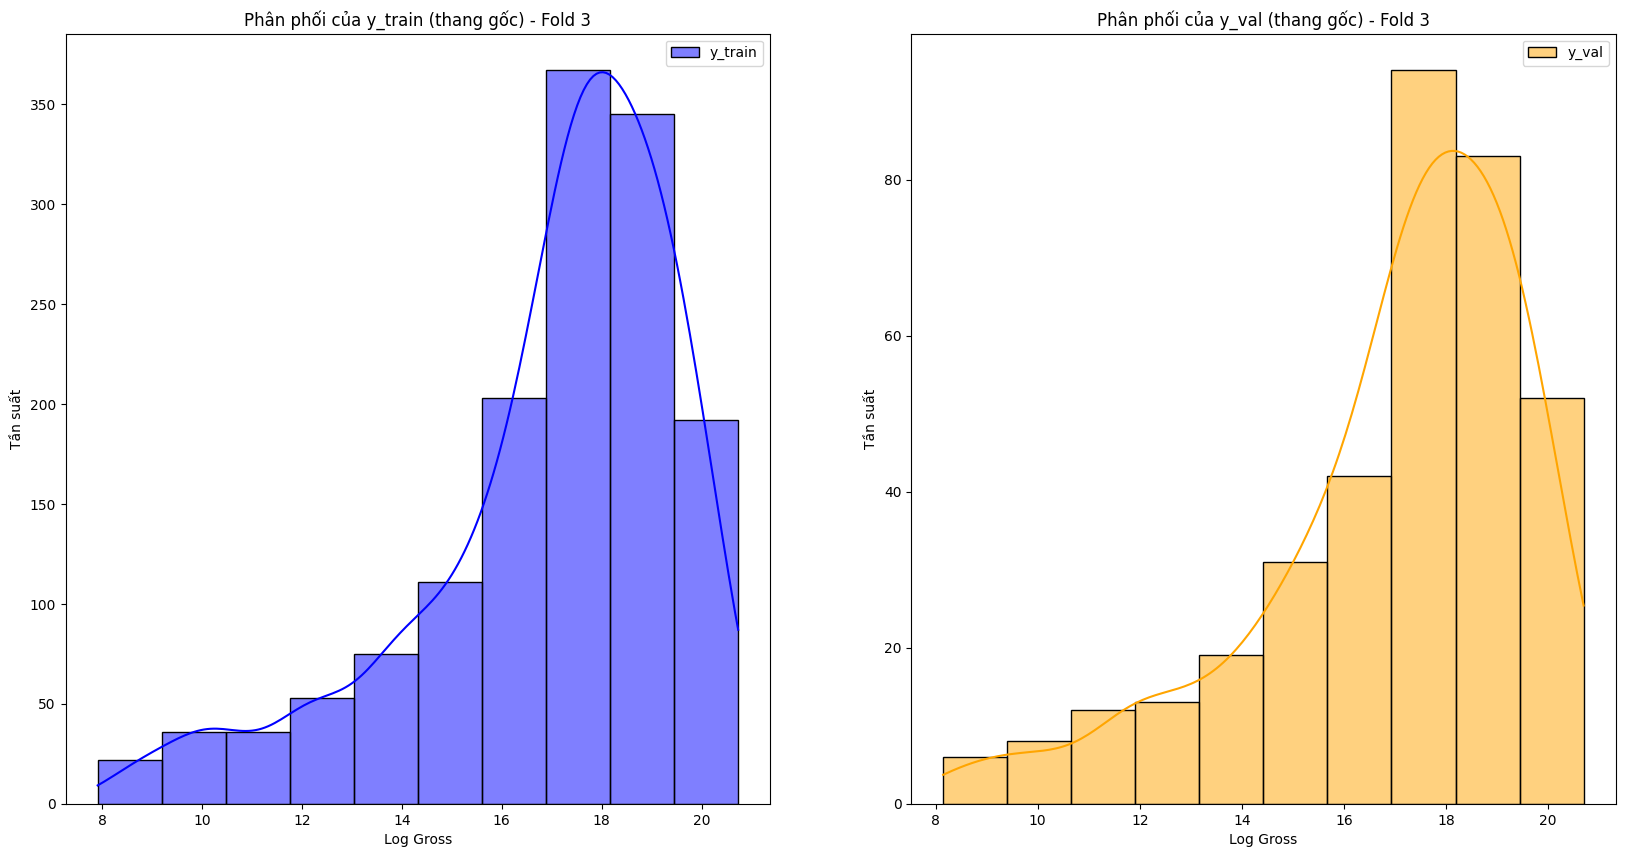

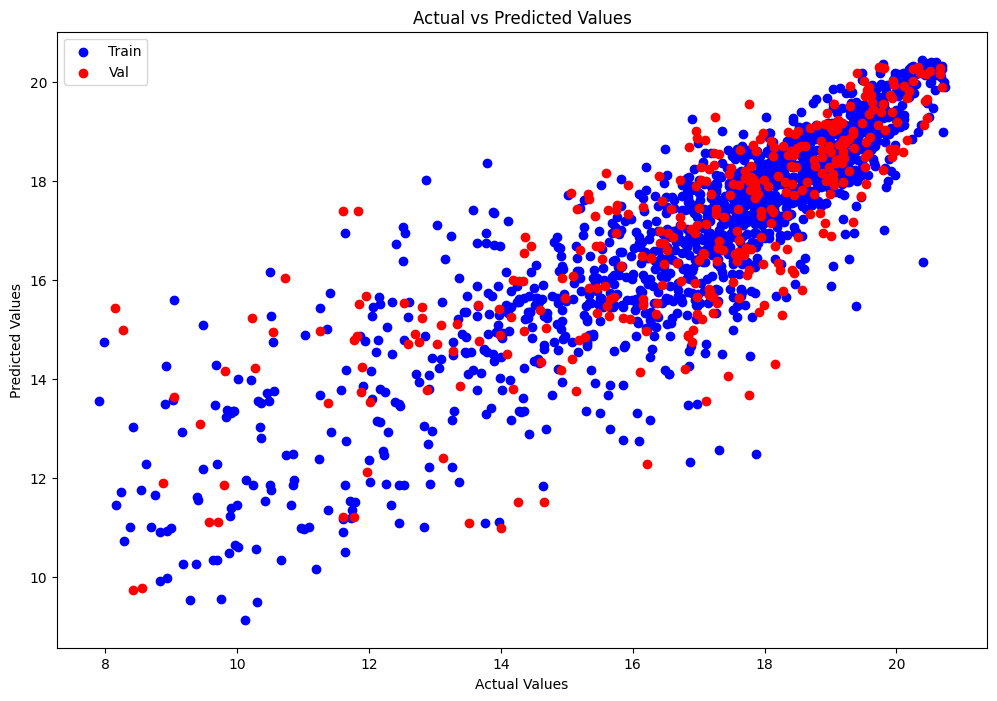

⚠️ Model does not support 'feature_importances_' (e.g., HistGradientBoostingRegressor). Skipping feature importance plot.
📊 Train Metrics - R2: 0.7283, MAE: 49,714,016.19, MAPE: 459.62%
📊 Val Metrics   - R2: 0.6213, MAE: 61,744,727.83, MAPE: 1178.93%
✅ Model for fold 3 saved to: best_models/GB_model/fold_3\model.pkl

🔁 Fold 4
✅ Scaler saved to: d:\Thanh\TLHT\HK6\KHDL\movie-analyst\best_models\GB_model\fold_4\scaler.pkl
✅ Best parameters found: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 200}
🔍 Best params for fold 4: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 200}
✅ Early stopped at iteration: 66
📉 Validation loss at best iteration: -1.3809
Training Metrics
R2 score: 0.6987
MAE: 53,365,760.1372
MAPE: 4.53%
Val Metrics
R2 score: 0.5683
MAE: 65,214,141.2091
MAPE: 24.52%


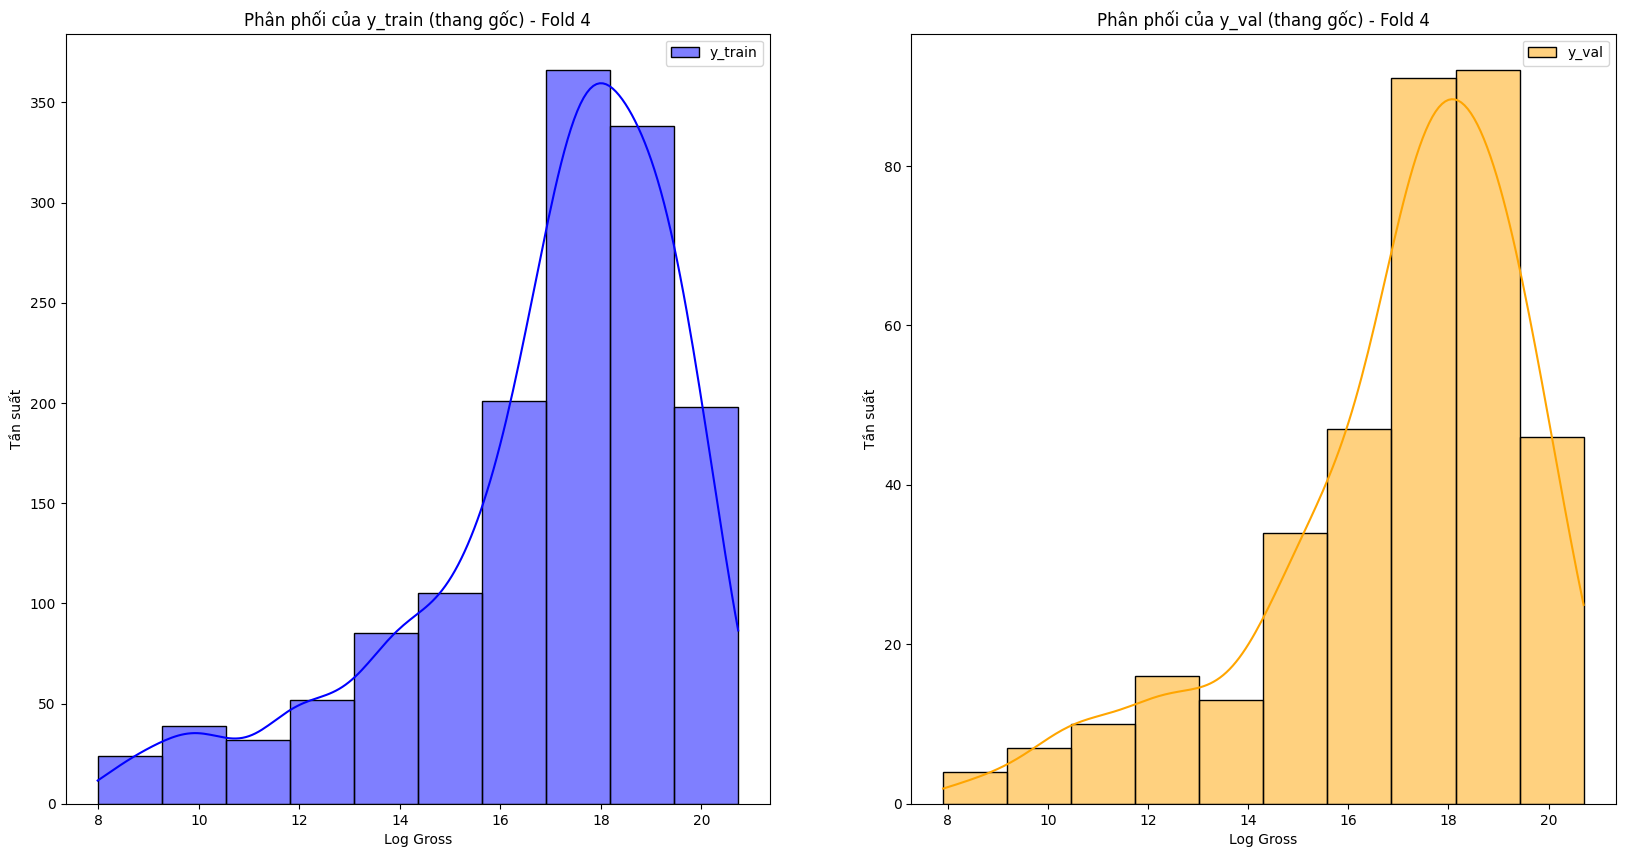

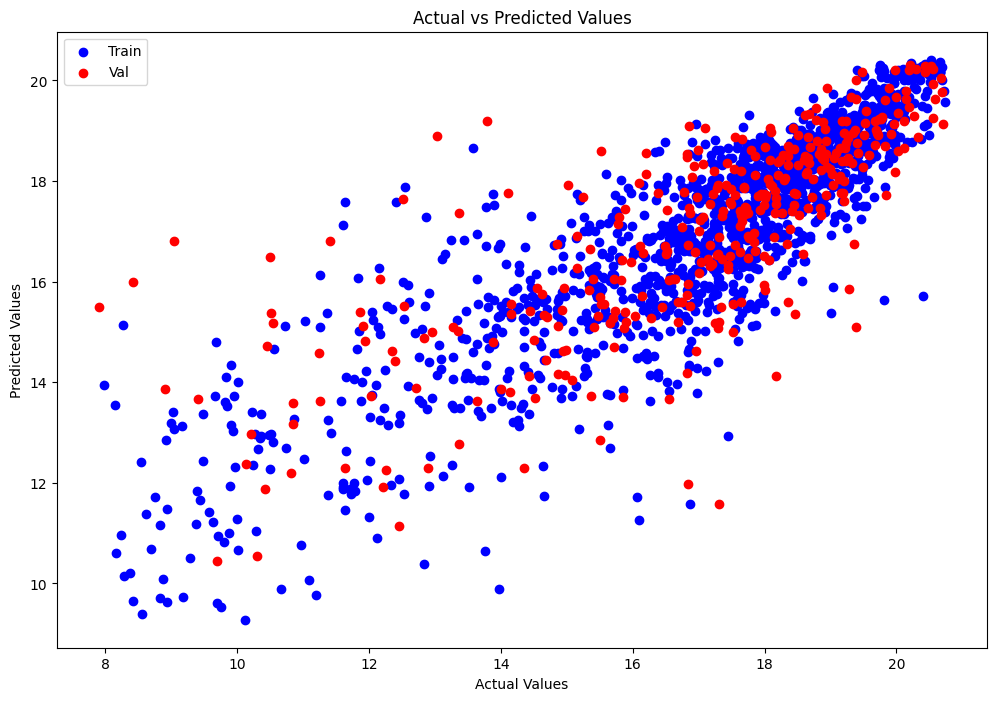

⚠️ Model does not support 'feature_importances_' (e.g., HistGradientBoostingRegressor). Skipping feature importance plot.
📊 Train Metrics - R2: 0.6987, MAE: 53,365,760.14, MAPE: 453.13%
📊 Val Metrics   - R2: 0.5683, MAE: 65,214,141.21, MAPE: 2452.22%
✅ Model for fold 4 saved to: best_models/GB_model/fold_4\model.pkl

🔁 Fold 5
✅ Scaler saved to: d:\Thanh\TLHT\HK6\KHDL\movie-analyst\best_models\GB_model\fold_5\scaler.pkl
✅ Best parameters found: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 200}
🔍 Best params for fold 5: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 200}
✅ Early stopped at iteration: 76
📉 Validation loss at best iteration: -0.9926
Training Metrics
R2 score: 0.7383
MAE: 49,992,645.8494
MAPE: 3.22%
Val Metrics
R2 score: 0.6755
MAE: 52,120,846.4843
MAPE: 6.64%


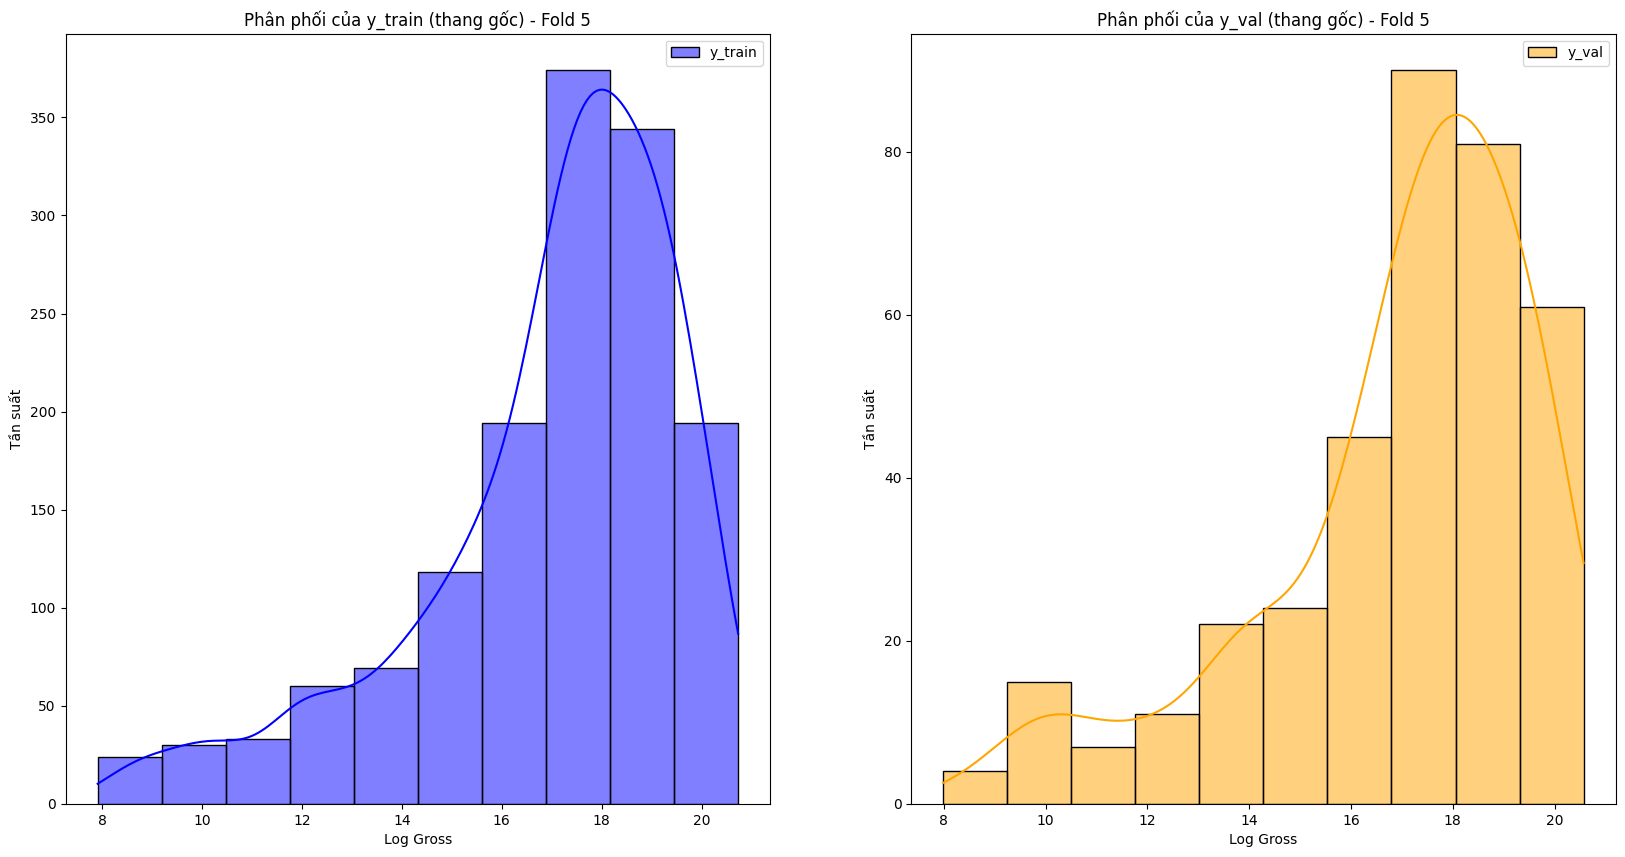

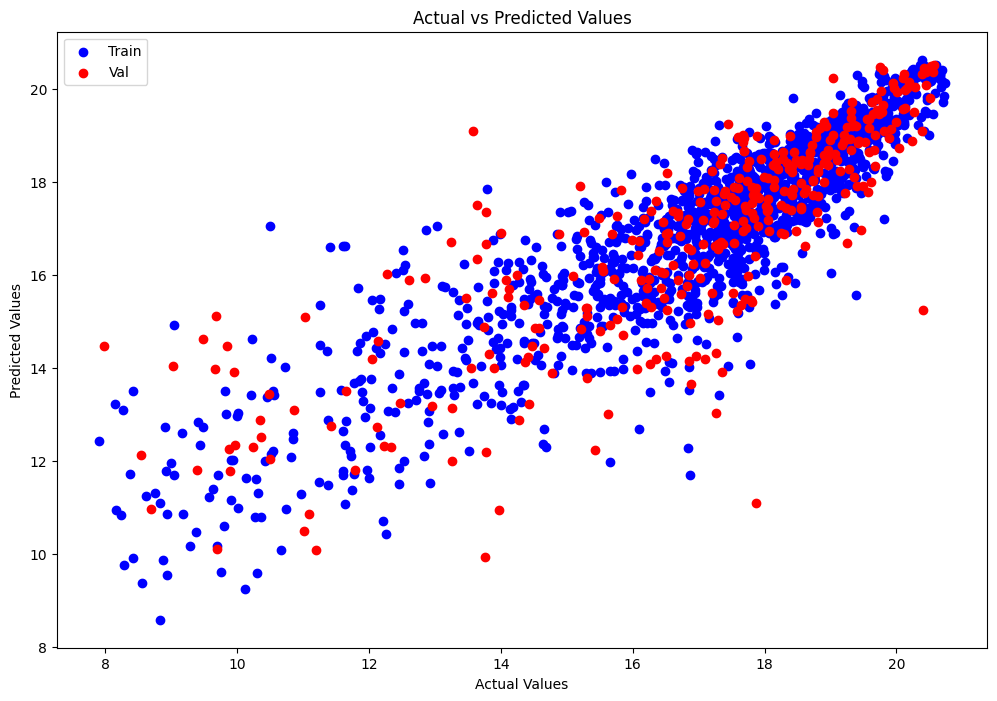

⚠️ Model does not support 'feature_importances_' (e.g., HistGradientBoostingRegressor). Skipping feature importance plot.
📊 Train Metrics - R2: 0.7383, MAE: 49,992,645.85, MAPE: 322.41%
📊 Val Metrics   - R2: 0.6755, MAE: 52,120,846.48, MAPE: 663.64%
✅ Model for fold 5 saved to: best_models/GB_model/fold_5\model.pkl


In [4]:
import joblib
import os
from settings import FEATURES, TARGET

# Khởi tạo mảng lưu trữ các chỉ số đánh giá cho từng fold
train_r2_list, train_mae_list, train_mape_list = [], [], []
val_r2_list, val_mae_list, val_mape_list = [], [], []

# Khởi tạo biến lưu tên model tốt nhất
best_models = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"\n🔁 Fold {fold + 1}")

    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()

    features = FEATURES
    target = TARGET

    X_train, y_train, X_val, y_val = processing_data(
        df_train, df_val,
        fold=fold,
        features=features,
        target=target,
        model_name="GB_model",
    )

    best_model, best_params = train_best_hgb_model(X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

    print(f"🔍 Best params for fold {fold + 1}: {best_params}")

    # Fit model
    best_model.fit(X_train, y_train)

    # In validation loss tại từng iteration (nếu có)
    if hasattr(best_model, 'validation_score_'):
        print(f"✅ Early stopped at iteration: {best_model.n_iter_}")
        print(f"📉 Validation loss at best iteration: {best_model.validation_score_[best_model.n_iter_ - 1]:.4f}")

    # Dự đoán và tính toán chỉ số
    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)

    train_r2, train_mae, train_mape, val_r2, val_mae, val_mape = visualize_results(
        y_train, train_preds, y_val, val_preds,
        model=best_model, df=pd.DataFrame(X_train, columns=features),
        calculate_real_target=True,
    )

    # In kết quả
    print(f"📊 Train Metrics - R2: {train_r2:.4f}, MAE: {train_mae:,.2f}, MAPE: {train_mape:.2%}")
    print(f"📊 Val Metrics   - R2: {val_r2:.4f}, MAE: {val_mae:,.2f}, MAPE: {val_mape:.2%}")

    # Ghi nhận kết quả cho mỗi fold
    train_r2_list.append(train_r2)
    train_mae_list.append(train_mae)
    train_mape_list.append(train_mape)

    val_r2_list.append(val_r2)
    val_mae_list.append(val_mae)
    val_mape_list.append(val_mape)

    # Lưu model tốt nhất của từng fold vào thư mục tương ứng
    model_dir = f"best_models/GB_model/fold_{fold + 1}"
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, "model.pkl")
    joblib.dump(best_model, model_path)
    best_models.append(model_path)

    print(f"✅ Model for fold {fold + 1} saved to: {model_path}")


In [6]:
# In trung bình các chỉ số
print("\n📊 Trung bình kết quả qua các folds:")
print(f"Train MAE: {np.mean(train_mae_list):.4f}")
print(f"Val  MAE: {np.mean(val_mae_list):.4f}")
print(f"Train R²  : {np.mean(train_r2_list):.4f}")
print(f"Val  R²  : {np.mean(val_r2_list):.4f}")
print(f"Train MAPE: {np.mean(train_mape_list):.2f}%")
print(f"Val  MAPE: {np.mean(val_mape_list):.2f}%")


📊 Trung bình kết quả qua các folds:
Train MAE: 50982597.0632
Val  MAE: 58708494.3163
Train R²  : 0.7192
Val  R²  : 0.6436
Train MAPE: 4.26%
Val  MAPE: 11.18%


## 3. Kiểm tra lại với tập test

In [10]:
features = ['meta_score', 'rating', 'no_of_votes', 'budget', 'genre_stat_feature', 'country_stat_feature']

# Chuẩn bị dữ liệu test
df_test = pd.read_csv(os.path.join(BASE_DIR, "dataset", "test.csv"))
df = pd.read_csv(data_path)
df.head()

,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_budget,log_no_of_votes,log_gross,log_gross_bin
0,"Supernatural Horror, Vampire Horror, Horror, T...",5.6,33000,47.000000,2024.0,851156.0,26000000.0,United States,17.073607,10.404293,13.654352,1
1,"Drama, Music, Romance",5.6,23000,55.000000,2017.0,1813453.0,26000000.0,United States,17.073607,10.043293,14.410744,1
2,"Computer Animation, Adventure, Animation, Come...",6.0,18000,53.000000,2023.0,209646030.0,95000000.0,"United States, United Kingdom",18.369387,9.798183,19.160931,8
3,"Body Horror, Folk Horror, Monster Horror, Supe...",4.5,12000,45.000000,2024.0,2014050.0,20000000.0,"United States, United Kingdom, Germany, Bulgaria",16.811243,9.392745,14.515659,1
4,"Steamy Romance, Drama, Romance",6.0,27000,64.812903,2010.0,844281.0,26000000.0,Spain,17.073607,10.203629,13.646242,1


In [11]:
from data import _split_column
from data import _apply_target_encoding

def process_test_data(df_test: pd.DataFrame, features, encoding_dir: str):
    import json

    # Tách genres và countries
    df_test['genres_list'] = _split_column(df_test, 'genres')
    df_test['countries_list'] = _split_column(df_test, 'countries')

    # Load encoding từ file json
    with open(os.path.join(encoding_dir, "genre_encoding.json")) as f:
        genre_encoding = json.load(f)
    with open(os.path.join(encoding_dir, "country_encoding.json")) as f:
        country_encoding = json.load(f)

    # Áp dụng encoding để tạo đặc trưng thống kê
    _apply_target_encoding(df_test, df_test['genres_list'], genre_encoding, 'genre_stat_feature')
    _apply_target_encoding(df_test, df_test['countries_list'], country_encoding, 'country_stat_feature')

    # Log transform các đặc trưng
    for col in ['country_stat_feature', 'genre_stat_feature']:
        df_test[f'log_{col}'] = np.log1p(df_test[f"{col}"])

    # Load scaler
    scaler_path = os.path.join(encoding_dir, "scaler.pkl")
    scaler = joblib.load(scaler_path)

    X_test = scaler.transform(df_test[features].values)
    y_test = df_test['gross'].values

    return X_test, y_test

In [12]:
fold_scores = []

for fold in range(1, 6):
    print(f"\n🔍 Testing with model from Fold {fold}")

    fold_dir = f"best_models/GB_model/fold{fold}"
    model_path = os.path.join(fold_dir, "model.pkl")

    if not os.path.exists(model_path):
        print(f"⚠️ Missing model for fold {fold}")
        continue

    # Load model
    model = joblib.load(model_path)

    # Xử lý dữ liệu test
    X_test, y_test = process_test_data(df_test.copy(), features, encoding_dir=fold_dir)

    # Dự đoán và đánh giá
    log_pred = model.predict(X_test)
    y_pred = np.expm1(log_pred)  # Chuyển đổi về giá trị gốc

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"📊 Fold {fold} - R2: {r2:.4f} | MAE: {mae:.4f} | MAPE: {mape:.4f}")
    fold_scores.append((fold, r2, mae, mape))


🔍 Testing with model from Fold 1


FileNotFoundError: [Errno 2] No such file or directory: 'best_models/GB_model/fold1\\genre_encoding.json'

In [ ]:
# Trung bình kết quả các fold
r2_avg = np.mean([s[1] for s in fold_scores])
mae_avg = np.mean([s[2] for s in fold_scores])
mape_avg = np.mean([s[3] for s in fold_scores])

print(f"\n📈 AVERAGE over folds - R2: {r2_avg:.4f} | MAE: {mae_avg:.4f} | MAPE: {mape_avg:.4f}")


In [ ]:
all_preds = []
y_test = None  # Chỉ cần lấy 1 lần

for fold in range(1, 6):
    print(f"\n🔍 Loading model and encoding from Fold {fold}")

    fold_dir = f"best_models/GB_model/fold{fold}"
    model_path = os.path.join(fold_dir, "model.pkl")

    if not os.path.exists(model_path):
        print(f"⚠️ Missing model for fold {fold}")
        continue

    model = joblib.load(model_path)

    # Xử lý dữ liệu test (sử dụng encoding + scaler của từng fold)
    X_test_fold, y_test_fold = process_test_data(df_test.copy(), features, encoding_dir=fold_dir)

    # Chỉ cần lưu y_test một lần (giống nhau cho mọi fold)
    if y_test is None:
        y_test = y_test_fold

    # Dự đoán và lưu lại
    # Dự đoán và đánh giá
    log_pred = model.predict(X_test)
    y_pred_fold = np.expm1(log_pred)  # Chuyển đổi về giá trị gốc

    all_preds.append(y_pred_fold)

# Trung bình dự đoán từ tất cả mô hình
y_pred_avg = np.mean(all_preds, axis=0)

# Đánh giá
r2 = r2_score(y_test, y_pred_avg)
mae = mean_absolute_error(y_test, y_pred_avg)
mape = mean_absolute_percentage_error(y_test, y_pred_avg)

print(f"\n📊 Ensemble Results (Average of 5 folds):")
print(f"🔹 R2: {r2:.4f} | MAE: {mae:.4f} | MAPE: {mape:.4f}")